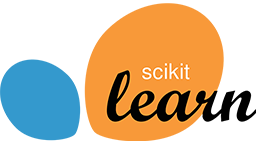

# Title : Logistic Regression pada Binary Classification Task
#### Source : https://youtu.be/oe7DW4rSH1o

Referensi: https://en.wikipedia.org/wiki/Logistic_regression

### Formula Dasar

- Nilai sumbu x pada simple linear regression adalah feature tunggal.
- Nilai sumbu x pada multiple linear regression adalah feature jamak.
- Saat model logistic regression dijalankan maka kurva sigmoid akan terbentuk.
- Dalam kurva tersebut, sumbu Y, selalu berada di rentang 0 s/d 1.

#### Simple Linear Regression

- $y = \alpha + \beta x$
- $g(x) = \alpha + \beta x$

#### Multiple Linear Regression

- $y = \alpha + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n$
- $g(X) = \alpha + \beta X$

#### Logistic Regression

- $g(X) = sigmoid(\alpha + \beta X)$
- $sigmoid(x) = \frac{1}{1 + exp(-x)}$

![](./images/sigmoid.png)

### Dataset: SMS Spam Collection Data Set

Referensi: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

- Contoh dataset yang tidak imbang/ berantakan.

In [ ]:
import pandas as pd

df = pd.read_csv('./dataset/SMSSpamCollection',
                 sep='\t',
                 header=None,
                 names=['label', 'sms'])
df.head()

In [ ]:
df['label'].value_counts()

### Training & Testing Dataset

- Fungsi LabelBinarizer() digunakan untuk mengkonversi nilai data menjadi biner.
- Fungsi rave() digunakan untuk mengubah nilai array multidimensi menjadi 1 dimensi

In [ ]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

print(X_train, '\n')
print(y_train)

### Feature Extraction dengan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf)

### Binary Classification dengan Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f'PRED: {pred} - SMS: {sms}\n')

### Evaluation Metrics pada Binary Classification

- Confusion Matrix
- Accuracy
- Precission & Recall
- F1 Score
- ROC

#### Terminologi Dasar

- True Positive (TP)
- True Negative (TN)
- False Positive (FP)
- False Negative (FN)

#### Confusion Matrix

Confusion matrix seringkali juga dikenal sebagai error matrix.

Referensi: https://en.wikipedia.org/wiki/Confusion_matrix

- Digunakan untuk menampilkan nilai teminologi dasar

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

In [ ]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Accuracy

Accuracy mengukur porsi dari hasil prediksi yang tepat.

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{correct}{total}$

Referensi: https://en.wikipedia.org/wiki/Accuracy_and_precision

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

#### Precission & Recall

Selain menggunakan accuracy, performa dari suatu classifier  umumnya juga diukur berdasarkan nilai Precission dan Recall.

Referensi: https://en.wikipedia.org/wiki/Precision_and_recall

##### Precission or  Positive Predictive Value (PPV)

$Precission = \frac{TP}{TP + FP}$

Referensi: [https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values]

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

##### Recall or  True Positive Rate (TPR) or Sensitivity

$Recall = \frac{TP}{TP + FN}$


Referensi: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

#### F1-Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

#### ROC: Receiver Operating Characteristic

ROC menawarkan visualisasi terhadap performa dari classifier dengan membandingkan nilai Recall (TPR) dan nilai Fallout (FPR)

$fallout = \frac{FP}{TN+FP}$

Referensi: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

![](./images/ROC.png)

- Garis berwarna biru mengindikasikan performa terbaik.
- Garis berwarna orange mengindikasikan performa menengah.
- Garis berwarna hijau mengindikasikan performa terburuk.
- Semakin ke kiri atas suatu model, maka performa yang ditunjukan semakin baik.

In [ ]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test_tfidf)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random CLassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()